<h1 style="text-align:center; color:green; font-size:48px;">
POEN Project 2
</h1>

#### Install libraries (if you did not do it before on the terminal)

In [1]:
!pip install numpy==2.0.2 pandas==2.3.1
!pip install matplotlib
!pip install git+https://github.com/oemof/dhnx.git@dev
!pip install osmnx==1.9.4 oemof.solph==0.5.6

  Cloning https://github.com/oemof/dhnx.git (to revision dev) to c:\users\maxen\appdata\local\temp\pip-req-build-_uy5b5fn
  Resolved https://github.com/oemof/dhnx.git to commit 51a853a2c4c481f005cddd24e6aec9743203ce09
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/oemof/dhnx.git 'C:\Users\maxen\AppData\Local\Temp\pip-req-build-_uy5b5fn'


  Using cached osmnx-1.9.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached geopandas-0.14.4-py3-none-any.whl.metadata (1.5 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached shapely-2.0.7-cp39-cp39-win_amd64.whl.metadata (7.1 kB)
INFO: pip is looking at multiple versions of oemof-solph to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    osmnx 1.9.4 depends on numpy<1.27 and >=1.20
    oemof-solph 0.5.6 depends on numpy>=2.0.0

Additionally, some packages in these conflicts have no matching distributions available for your environment:
    numpy

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict



ERROR: Cannot install oemof-solph==0.5.6 and osmnx==1.9.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


# Import libraries

In [1]:
import matplotlib.pyplot as plt
import dhnx
import pandas as pd
import oemof.solph
from pyomo.environ import SolverFactory

Need to install geopandas to process osm data.
Need to install shapely to download from osm.
Need to install shapely to download from osm.
Need to install geopandas to download from osm.
Need to install osmnx to download from osm.
Need to install CoolProp to use the hydraulic pre-calculation module.
Need to install geopandas to process geometry data.
Need to install shapely to process geometry.
Need to install geopandas to process geometry data.
Need to install shapely to process geometry.


# STEP 1 

## 1.1 Create network and plot

In [2]:
# Initialize thermal network
network = dhnx.network.ThermalNetwork()

# Load town parameter
network = network.from_csv_folder(r"C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\DHNx_files\Step_1\twn_data")

# Load investment parameter
invest_opt = dhnx.input_output.load_invest_options(r"C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\DHNx_files\Step_1\invest_data")

#pipes 
DN_30 = {
    'abs_thermal_losses' : 8.6e-3, 
    'fixed_costs' : 491, 
    'max_capacity' : 54,
    'min_capacity' : 53,
}

DN_50 = {
    'abs_thermal_losses' : 0.0091, 
    'fixed_costs' : 563, 
    'max_capacity' : 179,
    'min_capacity' : 178,
}


In [3]:
#Load the heating demand 
df = pd.read_excel(r'C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\Project 2_DHN_demand_profiles_2025(1).xlsx')
df.head()

,Hour,Load 14,Load 27,Load 36,Load 37,Load 38
0,0,119.6,482.851600,582.718580,118,91
1,1,120.3,477.269461,568.370075,162,90
2,2,121.2,460.910422,539.049149,80,83
3,3,120.5,447.938052,516.745584,74,79
4,4,120.5,434.924603,489.367040,178,77


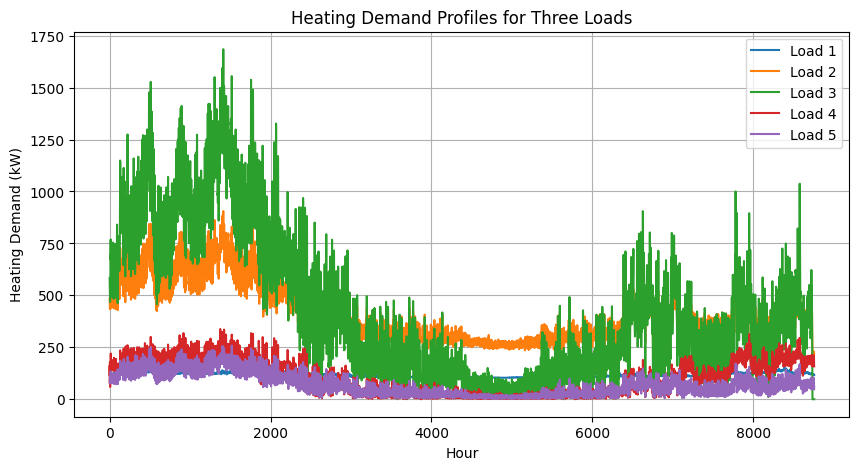

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Load 14'], label='Load 1')
plt.plot(df['Hour'], df['Load 27'], label='Load 2')
plt.plot(df['Hour'], df['Load 36'], label='Load 3')
plt.plot(df['Hour'], df['Load 37'], label='Load 4')
plt.plot(df['Hour'], df['Load 38'], label='Load 5')
plt.xlabel('Hour')
plt.ylabel('Heating Demand (kW)')
plt.title('Heating Demand Profiles for Three Loads')
plt.legend()
plt.grid()
plt.show()

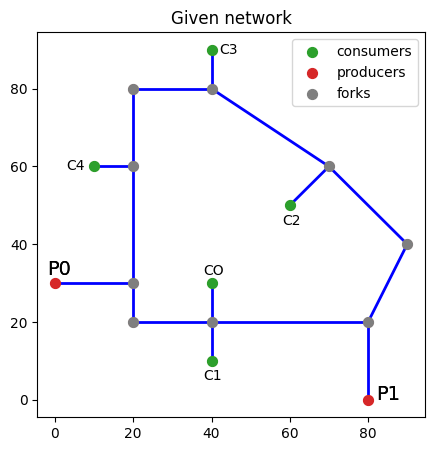

In [5]:
# plot initial/given network
static_map = dhnx.plotting.StaticMap(network) # That's how DHNx plots the network
static_map.draw(background_map=False) # This line to show the network on a blank area.
plt.title('Given network') 

#Scatter plots to differentiate the consumers, producers and forks. 
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50) 
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)
plt.text(-2, 32, 'P0', fontsize=14)
plt.text(82, 0, 'P1', fontsize=14)
plt.text(-2, 32, 'P0', fontsize=14)
plt.text(82, 0, 'P1', fontsize=14)
plt.text(38, 32, 'CO', fontsize=10)
plt.text(38, 5, 'C1', fontsize=10)
plt.text(58, 45, 'C2', fontsize=10)
plt.text(42, 89, 'C3', fontsize=10)
plt.text(3, 59, 'C4', fontsize=10)
plt.legend()
plt.show()

## 1.2 Investment optimization of the network

In [6]:
# Optimize the investment data
network.optimize_investment(invest_options=invest_opt,  solver='glpk')


c:\Users\maxen\anaconda3\envs\env_P2\lib\site-packages\oemof\solph\flows\_flow.py:163: FutureWarning: For backward compatibility, the option investment overwrites the option nominal_value. Both options cannot be set at the same time.
  warn(msg, FutureWarning)
c:\Users\maxen\anaconda3\envs\env_P2\lib\site-packages\oemof\network\network\nodes.py:250: FutureWarning: Usage of oemof.network.Component is deprecated. Use oemof.network.Node instead.
  warnings.warn(


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\maxen\AppData\Local\Temp\tmpgb8ssi90.glpk.raw --wglp C:\Users\maxen\AppData\Local\Temp\tmphuvl_g5n.glpk.glp
 --cpxlp C:\Users\maxen\AppData\Local\Temp\tmpoaaf4634.pyomo.lp
Reading problem data from 'C:\Users\maxen\AppData\Local\Temp\tmpoaaf4634.pyomo.lp'...
366 rows, 352 columns, 852 non-zeros
2361 lines were read
Writing problem data to 'C:\Users\maxen\AppData\Local\Temp\tmphuvl_g5n.glpk.glp'...
1778 lines were written
GLPK Simplex Optimizer 5.0
366 rows, 352 columns, 852 non-zeros
Preprocessing...
364 rows, 350 columns, 846 non-zeros
Scaling...
 A: min|aij| =  5.000e-04  max|aij| =  1.000e+00  ratio =  2.000e+03
GM: min|aij| =  3.754e-01  max|aij| =  2.664e+00  ratio =  7.097e+00
EQ: min|aij| =  1.409e-01  max|aij| =  1.000e+00  ratio =  7.097e+00
Constructing initial basis...
Size of triangular part is 363
      0: obj =   0.000000000e+00 inf =   5.943e+04 (23)
     30: obj =   1.736410049e+

INFO:root:Optimization successful...


ValueError: Pipe id <built-in function id> already has an investment > 0!

## 1.3 Results postprocessing and Plotting 


In [7]:
# ####### Postprocessing and Plotting ###########
results_edges = network.results.optimization['components']['pipes']
print(results_edges[['from_node', 'to_node', 'hp_type', 'capacity',
                     'direction', 'costs', 'losses']])

results_edges.to_csv("Outputs/Ex1.results_edges.csv", index=True)

print('Objective value: ', network.results.optimization['oemof_meta']['objective'])

# assign new ThermalNetwork with invested pipes
twn_results = network
twn_results.components['pipes'] = results_edges[results_edges['capacity'] > 0.001]

# plot invested edges
static_map_2 = dhnx.plotting.StaticMap(twn_results)
static_map_2.draw(background_map=False)
plt.title('Result network')
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)
plt.text(-2, 32, 'P0', fontsize=14)
plt.text(82, 0, 'P1', fontsize=14)
plt.legend()
plt.show()

TypeError: unhashable type: 'list'

# STEP 2

## 2.1 Adding customers & Producers

In [52]:
# Initialize thermal network
network_step2 = dhnx.network.ThermalNetwork()

# Load town data file for town parameters
network_step2 = network_step2.from_csv_folder(r"C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\DHNx_files\Step_2\twn_data")

# Load investment parameter
invest_opt = dhnx.input_output.load_invest_options(r"C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\DHNx_files\Step_2\invest_data")

# Load demand profiles of 10 clients
df2 = pd.read_csv (r'C:\Users\maxen\OneDrive\Bureau\ECL\Double Diplome\2024_2025_DD\KTH\Cours\MJ2505_Practical_Opti\Project\Project 2 - DHN\POEN---Project-2\step_2_AB\twn_data\heat_profiles_10_consumers.csv')

In [53]:
df2.head()

,Hour,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0,1355.260278,19.6,32,19.744045,129.362935,91,1405.260278,69.6,87,69.744045
1,1,1319.940054,20.3,31,20.608397,127.566056,90,1369.940054,70.3,92,70.608397
2,2,1323.804362,21.2,28,21.040574,126.948536,83,1373.804362,71.2,88,71.040574
3,3,1294.556292,20.5,27,21.184632,128.199723,79,1344.556292,70.5,91,71.184632
4,4,1351.744605,20.5,23,22.625219,128.997819,77,1401.744605,70.5,84,72.625219


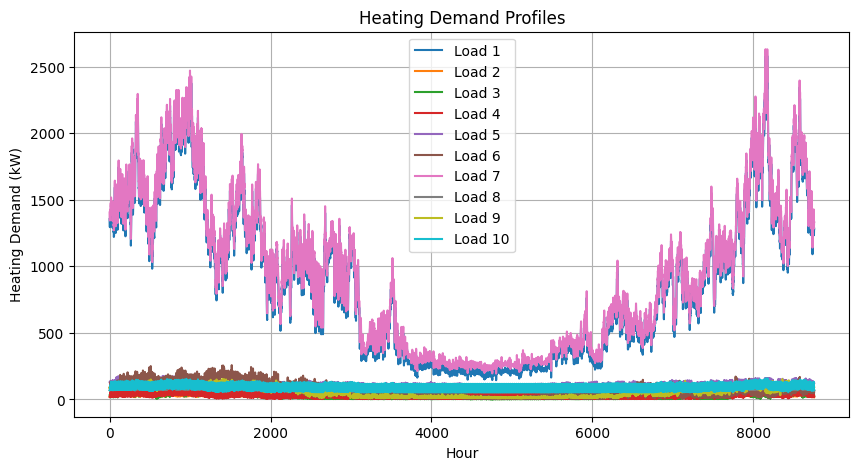

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df2['Hour'], df2['C1'], label='Load 1')
plt.plot(df2['Hour'], df2['C2'], label='Load 2')
plt.plot(df2['Hour'], df2['C3'], label='Load 3')
plt.plot(df2['Hour'], df2['C4'], label='Load 4')
plt.plot(df2['Hour'], df2['C5'], label='Load 5')
plt.plot(df2['Hour'], df2['C6'], label='Load 6')
plt.plot(df2['Hour'], df2['C7'], label='Load 7')
plt.plot(df2['Hour'], df2['C8'], label='Load 8')
plt.plot(df2['Hour'], df2['C9'], label='Load 9')
plt.plot(df2['Hour'], df2['C10'], label='Load 10')
plt.xlabel('Hour')
plt.ylabel('Heating Demand (kW)')
plt.title('Heating Demand Profiles')
plt.legend()
plt.grid()
plt.show()

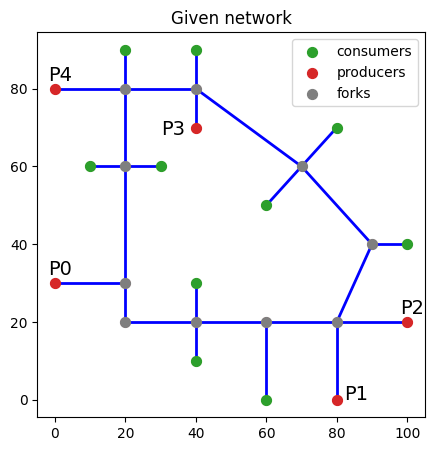

In [49]:
# Draw network
static_map = dhnx.plotting.StaticMap(network_step2)
static_map.draw(background_map=False)
plt.scatter(network_step2.components.consumers['lon'], network_step2.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50) 
plt.scatter(network_step2.components.producers['lon'], network_step2.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network_step2.components.forks['lon'], network_step2.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)
plt.title("Given network")
plt.text(-2, 32, 'P0', fontsize=14)
plt.text(82, 0, 'P1', fontsize=14)
plt.text(98, 22, 'P2', fontsize=14)
plt.text(30, 68, 'P3', fontsize=14)
plt.text(-2, 82, 'P4', fontsize=14)
plt.legend()

plt.show()

## 2.2 investment optimization of the thermal network

In [9]:
# Execute investment optimization
network.optimize_investment(invest_options=invest_opt, write_lp_file=True, solver='glpk')

ValueError: Network not connected! There are 2 parts, with the following number of nodes: 
[11, 5] 
These are the separated elements/networks: 
[{'forks-2', 'consumers-3', 'consumers-4', 'forks-6', 'producers-0', 'forks-1', 'forks-7', 'forks-0', 'consumers-1', 'forks-8', 'consumers-0'}, {'forks-4', 'forks-5', 'forks-3', 'producers-1', 'consumers-2'}]

## 2.3 Postprocessing and Plotting

*Results*
      from_node      to_node  length     hp_type  capacity  direction   costs  \
id                                                                              
0   producers-0      forks-0   4.000        None       0.0          0   0.000   
1   producers-0      forks-1   3.162  pipe-typ-A      33.0          1  52.173   
5       forks-0      forks-1   1.414        None       0.0          0   0.000   
6       forks-0      forks-2   1.414        None       0.0          0   0.000   
9       forks-1      forks-2   1.000  pipe-typ-A      18.0          1   9.000   
10      forks-1  consumers-0   1.000  pipe-typ-A      15.0          1   7.500   
12      forks-2  consumers-1   0.500  pipe-typ-A      18.0          1   4.500   

    losses  
id          
0      0.0  
1      0.0  
5      0.0  
6      0.0  
9      0.0  
10     0.0  
12     0.0  

Objective Value:  73.173
Costs re-calculation:  73.173


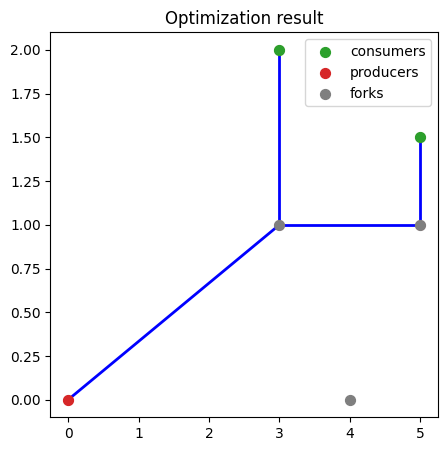

In [ ]:
# get results
results_edges = network.results.optimization["components"]["pipes"]
print("*Results*")
print(results_edges)
print("")
print("Objective Value: ", network.results.optimization["oemof_meta"]["objective"])

# manually recalculate total costs
total_costs = (33 * 3.162 + 15 * 1 + 18 * 1 + 18 * 0.5) * 0.5
print("Costs re-calculation: ", total_costs)

# get indices which are existing or invested
ind = results_edges[results_edges["capacity"] > 0].index

# select invested edges
network_result = network
network_result.components["pipes"] = results_edges.loc[ind]

# Plotting the optimization result
static_map = dhnx.plotting.StaticMap(network)
static_map.draw(background_map=False)
plt.title('Optimization result')
plt.scatter(network.components.consumers['lon'], network.components.consumers['lat'],
            color='tab:green', label='consumers', zorder=2.5, s=50)
plt.scatter(network.components.producers['lon'], network.components.producers['lat'],
            color='tab:red', label='producers', zorder=2.5, s=50)
plt.scatter(network.components.forks['lon'], network.components.forks['lat'],
            color='tab:grey', label='forks', zorder=2.5, s=50)
plt.legend()
plt.show()